Always scale the data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2 as cv
import os

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
generator = ImageDataGenerator(
            rotation_range = 20,
            shear_range = 0.1,
            zoom_range = 0.1,
            height_shift_range = 0.1,
            width_shift_range = 0.1,
            horizontal_flip = True,
            fill_mode = 'nearest',
            rescale = .1/255
            )

In [5]:
train_path = r"C:\Users\shubh\Desktop\Facial expressiion\train\train"
test_path = r"C:\Users\shubh\Desktop\Facial expressiion\test\test"

In [6]:
img = cv.imread(r"C:\Users\shubh\Desktop\Facial expressiion\train\train\angry\Training_3908.jpg")
img.shape

(48, 48, 3)

In [7]:
train_batch = generator.flow_from_directory(train_path, target_size = img.shape[:2], batch_size = 16, color_mode = 'grayscale', class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


In [8]:
test_batch = generator.flow_from_directory(test_path, target_size = img.shape[:2], batch_size = 16, color_mode = 'grayscale', class_mode = 'categorical', shuffle = False)

Found 7178 images belonging to 7 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [11]:
model = Sequential()

#part1
48
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48, 48, 1))) #input_shape is to be specified only once
model.add(Activation('elu'))       #using elu as it doesn't have negative input and smoothes slowly
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal', ))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))    #dropout refers to the percentage of neurons to be deactivated while transmission
#part2

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#part3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#part4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#part1
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#part2
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#part3
model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
Earlystop = EarlyStopping(patience = 3, monitor = 'val_loss')
ReduceLR = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, min_lr = 0.001, factor = 0.2)

In [20]:
model.fit(train_batch, epochs = 5, validation_data = test_batch, callbacks = [Earlystop, ReduceLR])

Epoch 1/8
1795/1795 [==============================] - 365s 203ms/step - loss: 1.1710 - accuracy: 0.5716 - val_loss: 1.0946 - val_accuracy: 0.5915
Epoch 2/8
1795/1795 [==============================] - 362s 202ms/step - loss: 1.1522 - accuracy: 0.5809 - val_loss: 1.0662 - val_accuracy: 0.6021
Epoch 3/8
1795/1795 [==============================] - 367s 204ms/step - loss: 1.1411 - accuracy: 0.5818 - val_loss: 1.1713 - val_accuracy: 0.5671
Epoch 4/8
1795/1795 [==============================] - 371s 207ms/step - loss: 1.1344 - accuracy: 0.5822 - val_loss: 1.0839 - val_accuracy: 0.5957
Epoch 5/8
1795/1795 [==============================] - 365s 203ms/step - loss: 1.1165 - accuracy: 0.5932 - val_loss: 1.0981 - val_accuracy: 0.5915


<AxesSubplot:>

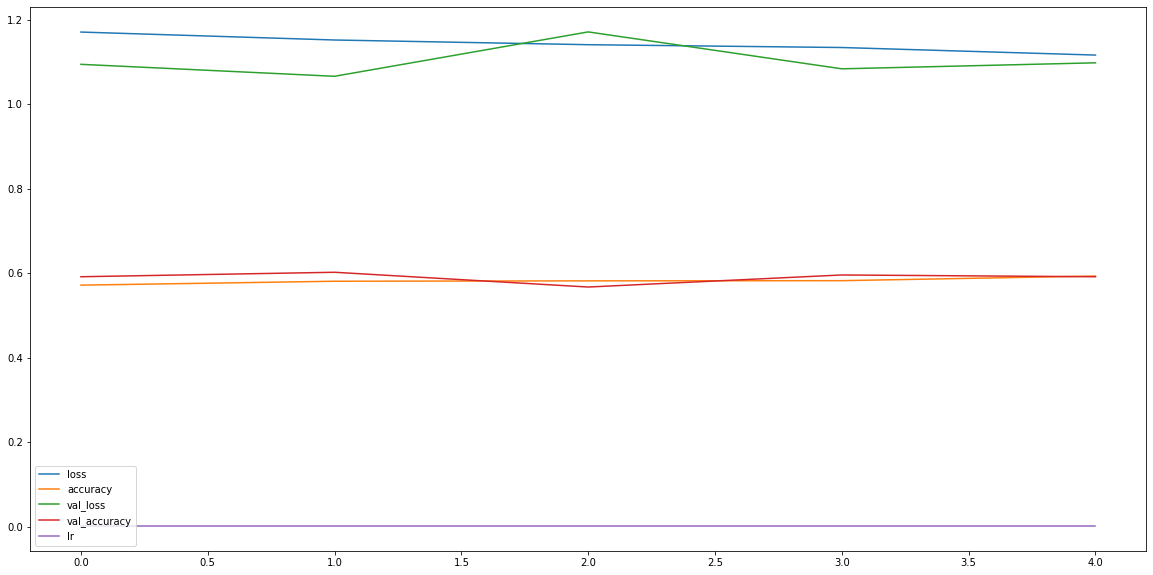

In [21]:
result = pd.DataFrame(model.history.history)
result.plot(figsize = (20, 10))

In [29]:
X, y = test_batch[0]

In [30]:
pred = model.predict(X)

In [31]:
pred[0].argmax()

5

In [32]:
y[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
model.save('face3.h5')